# Module 5 Exercises - Time Series

In [31]:
import pandas as pd
import numpy as np
import seaborn; seaborn.set()
import matplotlib.pyplot as plt

from datetime import datetime

%matplotlib inline

### Exercise 1:

Create a numPy datetime variable with today's date. Then create 7 consectuive days (1 week) starting from the variable with today's date.

In [32]:
date = np.array('2019-03-30',dtype=np.datetime64)
date + np.arange(7)

array(['2019-03-30', '2019-03-31', '2019-04-01', '2019-04-02',
       '2019-04-03', '2019-04-04', '2019-04-05'], dtype='datetime64[D]')

### Exercise 2:

Create a pandas datetime index with the dates 2016-02-11, 2016-07-01, 2016-07-09, 2016-10-08, 2017-02-18, 2017-02-25, 2017-05-02, 2017-08-26, 2017-12-15, and 2018-02-11. Then create a pandas Series with the values 0,1,2,3,4,5,6,7,8, and 9 in a list, with the dates as the index. Get the rows from the year 2017.  

In [33]:
index = pd.DatetimeIndex(['2016-02-11', '2016-07-01', '2016-07-09', '2016-10-08', '2017-02-18', 
                          '2017-02-25', '2017-05-02', '2017-08-26', '2017-12-15', '2018-02-11'])
data=pd.Series([0,1,2,3,4,5,6,7,8,9],index=index)
data

2016-02-11    0
2016-07-01    1
2016-07-09    2
2016-10-08    3
2017-02-18    4
2017-02-25    5
2017-05-02    6
2017-08-26    7
2017-12-15    8
2018-02-11    9
dtype: int64

In [34]:
data['2017']

2017-02-18    4
2017-02-25    5
2017-05-02    6
2017-08-26    7
2017-12-15    8
dtype: int64

### Exercise 3:

Convert the following date formats into pandas datetime:

- datetime(2017, 12, 15)
- 8th of October 2016
- 20180211
- 2017-02-25
- 2019-Jan-16

In [35]:
dateslist=pd.to_datetime([datetime(2017,12,15),'8th of October 2016','20180211','2017-02-25','2019-Jan-16'])
dateslist

DatetimeIndex(['2017-12-15', '2016-10-08', '2018-02-11', '2017-02-25',
               '2019-01-16'],
              dtype='datetime64[ns]', freq=None)

### Exercise 4:

Using the pandas library, make a time delta range that has five periods with a 1 hour 45 minute interval.

In [36]:
timerange = pd.timedelta_range('04:30:00', periods=5, freq='1H45T')
timerange

TimedeltaIndex(['04:30:00', '06:15:00', '08:00:00', '09:45:00', '11:30:00'], dtype='timedelta64[ns]', freq='105T')

### Exercise 5:

Using the pandas library, create a time delta range with 20 business days starting from today's date.

In [37]:
from pandas.tseries.offsets import BDay

bizdayrange = pd.date_range('2019-03-30',periods=20,freq=BDay())
bizdayrange

DatetimeIndex(['2019-04-01', '2019-04-02', '2019-04-03', '2019-04-04',
               '2019-04-05', '2019-04-08', '2019-04-09', '2019-04-10',
               '2019-04-11', '2019-04-12', '2019-04-15', '2019-04-16',
               '2019-04-17', '2019-04-18', '2019-04-19', '2019-04-22',
               '2019-04-23', '2019-04-24', '2019-04-25', '2019-04-26'],
              dtype='datetime64[ns]', freq='B')

### Exercise 6:

From [this link](https://notebooks.azure.com/priesterkc/projects/DABmaterial/tree/Lv1%20Data%20Analytics/datasets), download the "smalltravel.csv" file and upload it to your datasets folder. Import the traveltime_s.csv file into a dataframe. Resample the average speed column by week using the mean, and plot the graph. 

**Tip**: You do not need to add the line style in the plot code.

In [42]:
travdf = pd.read_csv('datasets/datasets_smalltravel.csv',parse_dates=True,index_col='Date') #pass extra argument to set "Date" column as index
travdf.head()

,GoingTo,AvgSpeed,MovingTime
Date,,,
2012-01-06,Home,78.3,36.3
2012-01-06,GSK,81.8,34.9
2012-01-04,Home,82.0,35.9
2012-01-04,GSK,74.2,35.6
2012-01-03,Home,83.4,34.8


In [39]:
#df_smtrav['Date']=pd.to_datetime(df_smtrav['Date'])

In [43]:
travdf.dtypes

GoingTo        object
AvgSpeed      float64
MovingTime    float64
dtype: object

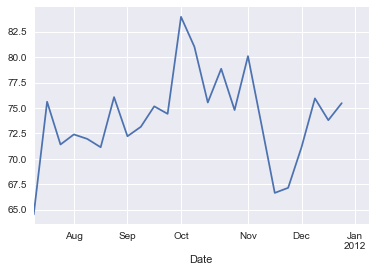

In [44]:
#resample data set by week using the mean

avgspeed_weekly = travdf['AvgSpeed'].resample('W').mean()

#avgspeed_weekly.plot(style=[':','--','-'])
avgspeed_weekly.plot()

### Exercise 7:

Using the dataframe from the previous exercise, write code to group the moving time column by day of the week, then plot the graph.

**Tip**: The index list only needs to contain the weekdays. You do not need to add the line style in the plot code.

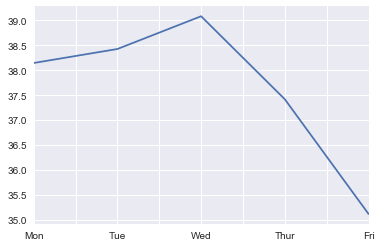

In [46]:
movtime_byweekday = travdf['MovingTime'].groupby(travdf.index.dayofweek).mean() #for every moving time time, group by day of week
movtime_byweekday.index = ['Mon','Tue','Wed','Thur','Fri']
movtime_byweekday.plot()